### "HeadPose"  Regression-Point Exercise pt 2

*This uses an updated model fit (`comma/models/ft-4b.pth`) to acheive excellent results.*

A detailed exploration of the canonical "headpose" exercise used for `PointBlock` style tasks.

 - We build multiple figures below to analyze the performance of the model

 - `headpose-prototype-figures-1.ipynb`: has much of the figure prototyping and training work which we import here.

**<u>Links:</u>**

**Fastai1, course-v3 pt.1 notebook:** https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-head-pose.ipynb

**Fastai2, Tutorial:**  https://dev.fast.ai/tutorial.vision#Points

In [1]:
from matplotlib import pyplot as plt
from fastai2.vision.all import *

%load_ext autoreload
%autoreload 2

In [2]:
from module.figs import show_figures

#### Setup

In [3]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [4]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c1,c2])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

def get_ip(img,pts): return TensorPoint.create(pts, img_size=img.size)

In [5]:
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_items=get_image_files,
                   splitter=FuncSplitter(lambda o: o.parent.name=='13'),
                   get_y=get_ctr,
                   batch_tfms=[*aug_transforms(size=(120,160)),     # different size
                               Normalize.from_stats(*imagenet_stats)])

dls = dblock.dataloaders(path, path=path, bs=64)

#### Load Model

In [7]:
learn = cnn_learner(dls, resnet18)

In [ ]:
# gcloud compute scp jupyter@may2-instance-1:~/.fastai/data/biwi_head_pose/models/ft-4b.pth .

In [24]:
learn.path = Path(os.getcwd())

In [25]:
!ls {learn.path/learn.model_dir}

ft-4b.pth


In [26]:
learn.load('ft-4b')

#### Analysis

In [27]:
preds = learn.get_preds()


Different Mean-Points for Training & Validation:


,x-mean,y-mean
training,-0.011,0.114
validation,0.108,0.004



MSE on diff predictions types:


,Actual,Predicted,MSE,RMSE
0,Train,mean-point: train,0.0337,0.1835
1,Valid,mean-point: train,0.0165,0.1285
2,Valid,mean-point: valid,0.0033,0.0578
3,Valid,model,0.0001,0.0112


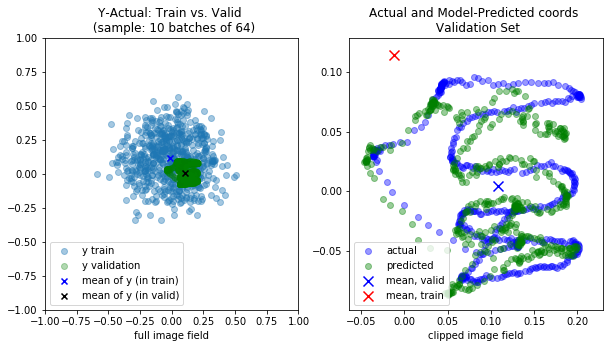

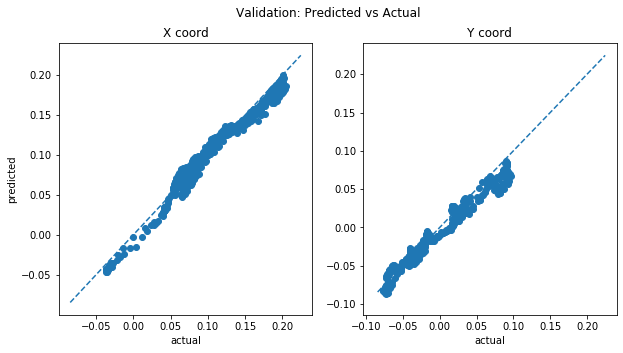

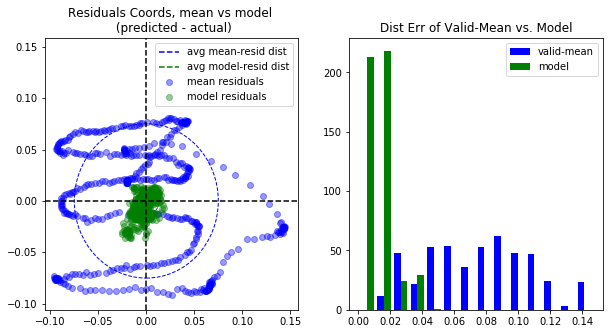

In [30]:
show_figures(dls,preds)